## Studying earnings based on college majors

This dataset contains the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

I'll be using Pandas for data manipulation and analysis, and matplotlib for the visualizations to help clarify certain data.

Some important columns in this dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code
- Major - Major description
- Major_category - Category of major
- Total - Total number of people with major
- Sample_size - Sample size (unweighted) of full-time (per major)
- Men - Male graduates
- Women - Female graduates
- ShareWomen - Women as share of total
- Employed - Number employed
- Median - Median salary of full-time, year-round workers
- Low_wage_jobs - Number in low-wage service jobs
- Full_time - Number employed 35 hours or more
- Part_time - Number employed less than 35 hours

### Reading dataset into dataframe and exploring the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])
print('-' * 80)
print(recent_grads.head())
print('-' * 80)
print(recent_grads.tail())
print('-' * 80)
print(recent_grads.describe())
raw_data_count = len(recent_grads)
#drop rows with missing values
recent_grads = recent_grads.dropna()

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
-----------

### Removing missing values
We can see below that only 1 row contained missing values.

In [2]:
print(raw_data_count)
print(len(recent_grads))

173
172


## Scatter Plots

Scatter Plots are generally used to see the relationship between two variables.  Plots trending upwards and to the right(ie /) shows a positive correlation, while down and to the right show a negative one.  They are not conclusive on their own, but may show a reason to investigate the data further.

First, we'll look at the relationship between the sample size of respondents (for each major surveyed) and both median wage and unemployment rate:

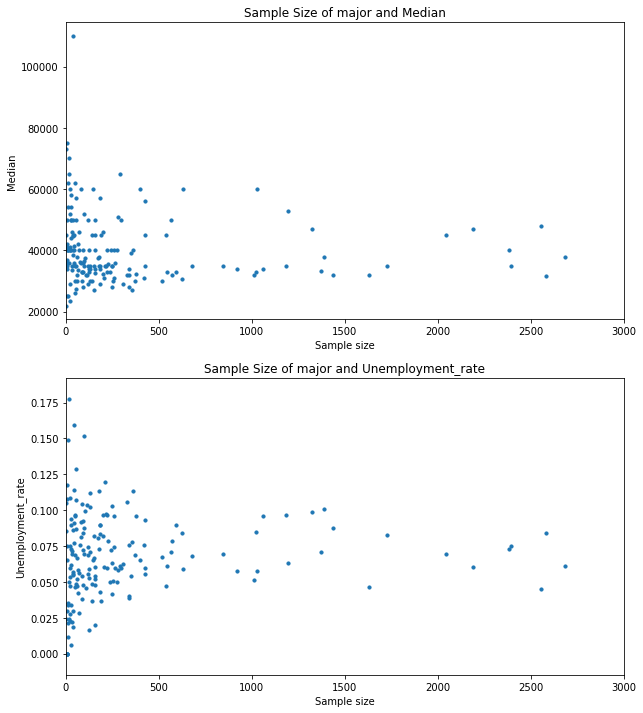

In [3]:
cat_y = ['Median', 'Unemployment_rate']

fig = plt.figure(figsize=(10, 12))

for sp in range(0,2):
    ax = fig.add_subplot(2,1,sp+1)
    ax.scatter(recent_grads['Sample_size'], recent_grads[cat_y[sp]], s=10)
    ax.set(xlabel = 'Sample size', ylabel = str(cat_y[sp]))
    ax.set_title('Sample Size of major and ' + str(cat_y[sp]))
    plt.xlim(0,3000)
plt.show()

In both cases, there doesn't appear to be any strong correlation.  The median salaries vary, but tend to aggregate around the mid-30k mark.  Similarly, regardless of sample size, the unemployment rate trends towards approximately 0.7 percent.

### Men and women median salaries

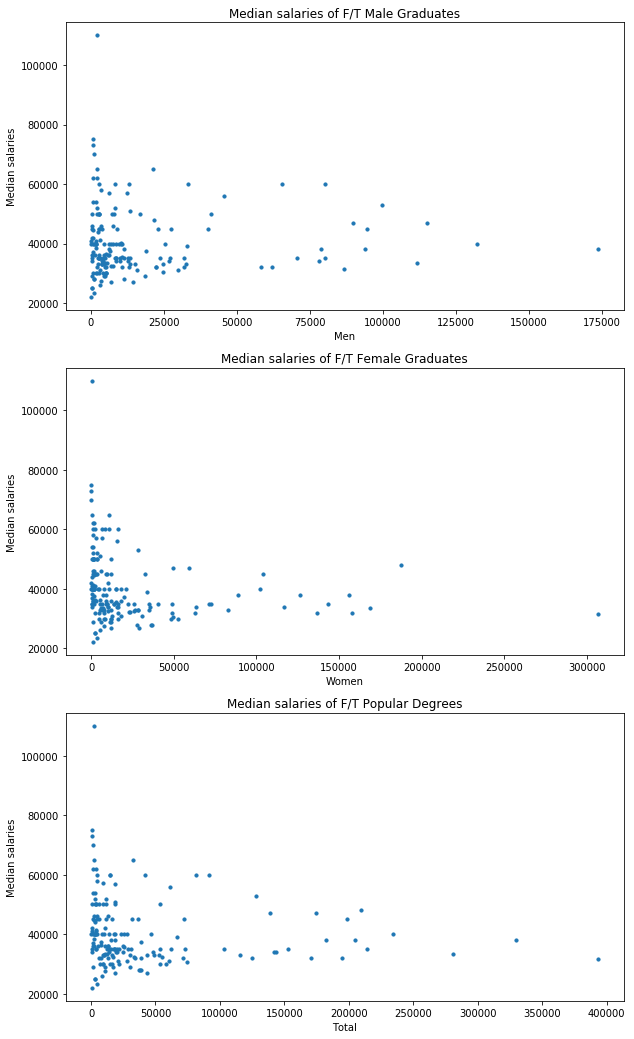

In [4]:
cat = ['Men', 'Women', 'Total']
desc = ['Male Graduates', 'Female Graduates', 'Popular Degrees']
fig = plt.figure(figsize=(10, 18))

for i in range(0,3):
    ax = fig.add_subplot(3,1,i + 1)
    ax.scatter(recent_grads[cat[i]], recent_grads['Median'], s=10)
    ax.set(xlabel = str(cat[i]), ylabel = 'Median salaries')
    ax.set_title('Median salaries of F/T ' + str(desc[i]))
plt.show()

As displayed above, degrees with higher amounts of male graduates appear to have higher median salaries.  The difference is not dramatic, but we need to dive deeper into the data to more completely understand the relationship. A couple theories may be (1) the proven tendency of males to get a higher wage then females (even for the same job); and (2) the specific male preferred degrees have a greater market value than female preferred degrees.

Consequently, there is a slight negative correlation between female preferred degrees and median income. The reasons could be similar to those written above.

There appears to be a weak correlation to more popular degrees having slightly lower average median incomes.  This is possibly due to a greater supply of the workers released into the workforce, and thus the ability for employers to pay less.  What makes a degree popular could include a whole host of reasons including personal preference, ability levels, ease of entry into program, parental/societal pressure, etc.

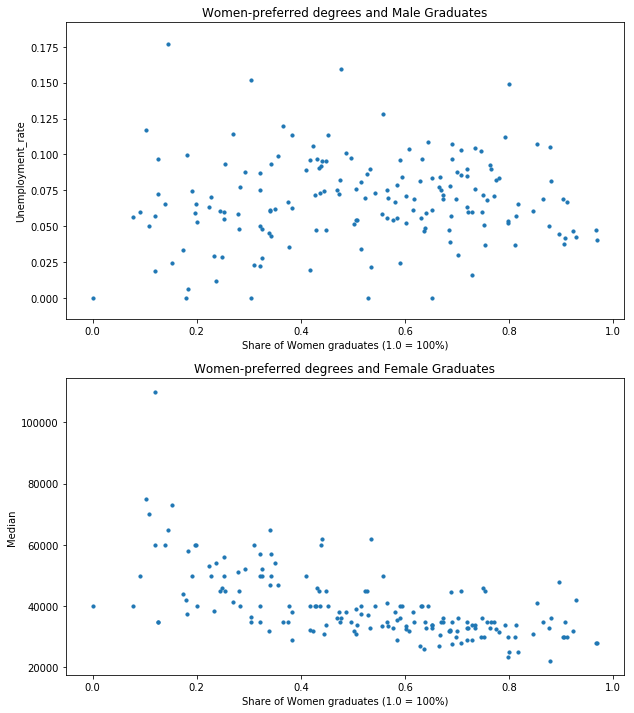

In [5]:
cat = ['Unemployment_rate', 'Median']
fig = plt.figure(figsize = (10,12))

for i in range(2):
    ax = fig.add_subplot(2,1,i + 1)
    ax.scatter(recent_grads['ShareWomen'], recent_grads[cat[i]], s=10)
    ax.set(xlabel = 'Share of Women graduates (1.0 = 100%)', ylabel = cat[i])
    ax.set_title('Women-preferred degrees and ' + str(desc[i]))
plt.show()

There does not appear to be any correlation on unemployment rate and share of women graduates.  However, there appears to be a negative correlation to percentage of women graduates and median income (reasons discussed above).

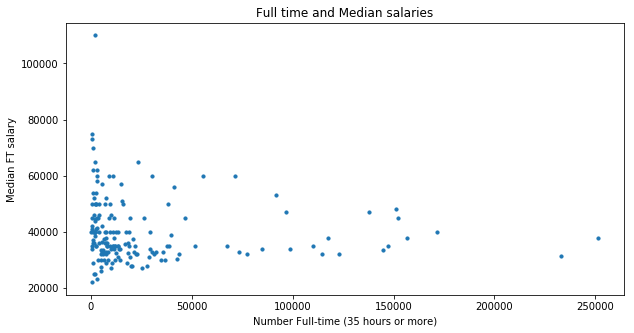

In [6]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(recent_grads['Full_time'],recent_grads['Median'], s=10)
ax.set(xlabel='Number Full-time (35 hours or more)', ylabel='Median FT salary')
ax.set_title('Full time and Median salaries')
plt.show()

There appears to be a slight negative correlation to number of full time workers and Median income (ie the more workers, the lower the median income).  Some basic supply and demand could help explain this.

### Correlation numbers
Though the purpose of this project is moreso for visualization, looking at some correlation numbers below, there are more things to consider plotting for visual effect.  The correlations between two columns can be read by looking at the intersection between them.

In [7]:
correlations = recent_grads.corr()
print(correlations)

                          Rank  Major_code     Total       Men     Women  \
Rank                  1.000000    0.097195  0.071137 -0.094780  0.174913   
Major_code            0.097195    1.000000  0.196784  0.179299  0.181459   
Total                 0.071137    0.196784  1.000000  0.878088  0.944764   
Men                  -0.094780    0.179299  0.878088  1.000000  0.672759   
Women                 0.174913    0.181459  0.944764  0.672759  1.000000   
ShareWomen            0.643781    0.259211  0.142999 -0.112014  0.297832   
Sample_size           0.004590    0.203375  0.945575  0.875176  0.862606   
Employed              0.066941    0.197345  0.996214  0.870605  0.944037   
Full_time             0.030748    0.195857  0.989339  0.893563  0.917681   
Part_time             0.190272    0.191798  0.950268  0.751592  0.954513   
Full_time_year_round  0.016402    0.202203  0.981112  0.892454  0.905720   
Unemployed            0.086736    0.220472  0.974768  0.869411  0.911694   
Unemployment

Yikes!  Ok, well let's filter some of these to better see the higher correlations (typically believed to start at +- 0.25). Values between -0.25 and 0.25 show "NaN", and values of 1.0 are perfectly correlated (with themselves).

In [8]:
high_correlations = correlations[(correlations > 0.25) | (correlations < -0.25)]
print(high_correlations)

                          Rank  Major_code     Total       Men     Women  \
Rank                  1.000000         NaN       NaN       NaN       NaN   
Major_code                 NaN    1.000000       NaN       NaN       NaN   
Total                      NaN         NaN  1.000000  0.878088  0.944764   
Men                        NaN         NaN  0.878088  1.000000  0.672759   
Women                      NaN         NaN  0.944764  0.672759  1.000000   
ShareWomen            0.643781    0.259211       NaN       NaN  0.297832   
Sample_size                NaN         NaN  0.945575  0.875176  0.862606   
Employed                   NaN         NaN  0.996214  0.870605  0.944037   
Full_time                  NaN         NaN  0.989339  0.893563  0.917681   
Part_time                  NaN         NaN  0.950268  0.751592  0.954513   
Full_time_year_round       NaN         NaN  0.981112  0.892454  0.905720   
Unemployed                 NaN         NaN  0.974768  0.869411  0.911694   
Unemployment

And specifically for 'ShareWomen' column:

In [9]:
women_corr = correlations['ShareWomen']
women_corr = women_corr[(women_corr > 0.25) | (women_corr < -0.25)]
print(women_corr)

Rank          0.643781
Major_code    0.259211
Women         0.297832
ShareWomen    1.000000
Median       -0.618690
P25th        -0.500199
P75th        -0.586932
Name: ShareWomen, dtype: float64


## Histograms

We'll look at histograms of various columns below.  The bins (intervals) are set fairly high to get a more precise picture.

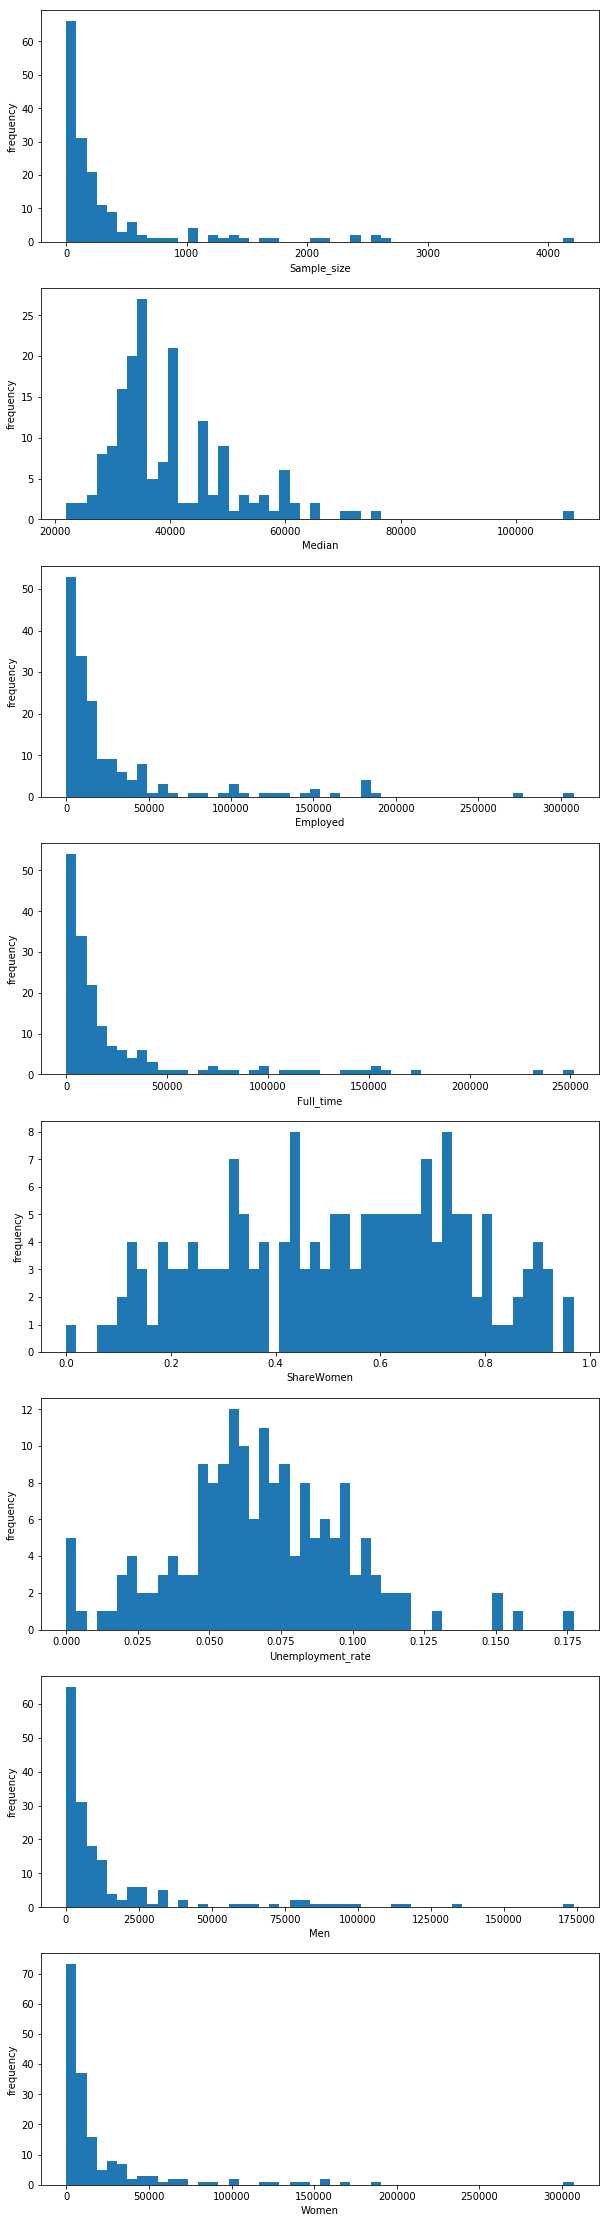

In [10]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

fig = plt.figure(figsize = (10,40))

for i in range(8):
    ax = fig.add_subplot(8,1,i + 1)
    ax.hist(recent_grads[cols[i]], bins=50)
    ax.set(xlabel = cols[i], ylabel = 'frequency')
plt.show()

In the above histograms, some things are worth mentioning: 

Many sample sizes trend towards lower numbers.  The lower the sample size, the less the sample accurately reflects the population.  Therefore, the low sample size for many degrees could skew the accuracy of the results.

The median salary data shows a highest frequency in the mid \\$30k and low \$40k mark.

Both "Employed" and "Full_time" tend to trace the sample sizes histograms fairly accurately as they are numbers (and not based on percentages), and thus don't tell us a whole lot.

Share of women in degrees tends to approximate a normal distribution curve for the most part.  This said, highest counts tended to aggregate in the low 40 and low 70 percent intervals.



#### What percentage of major are predominantly male?

In [11]:
num=0
for i in recent_grads['ShareWomen']:
    if i < 0.5:
        num += 1
print(num/172)

0.4418604651162791


Approximately 44% of majors are predominantly male, and thus approximately 56% are predominantly female.

#### What is the most common median salary range?

In [12]:
recent_grads['Median'].mode()

0    35000
dtype: int64

The most common median salary range in this dataset is $35,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A06F66160>,
      dtype=object)

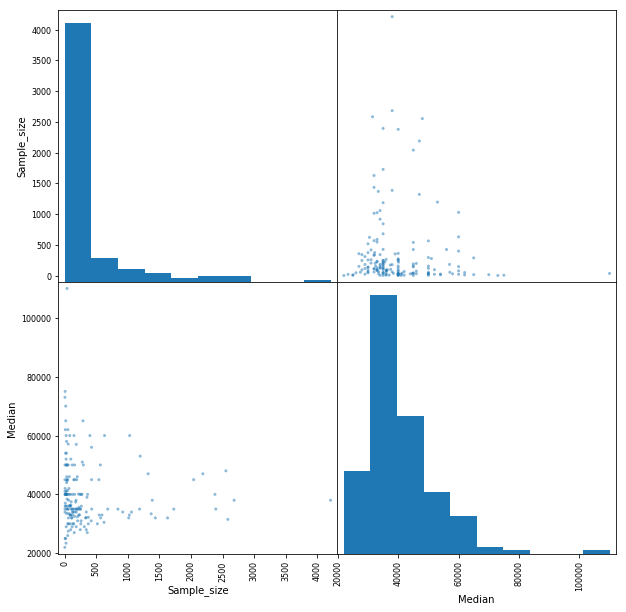

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013A06F660B8>,
      dtype=object)

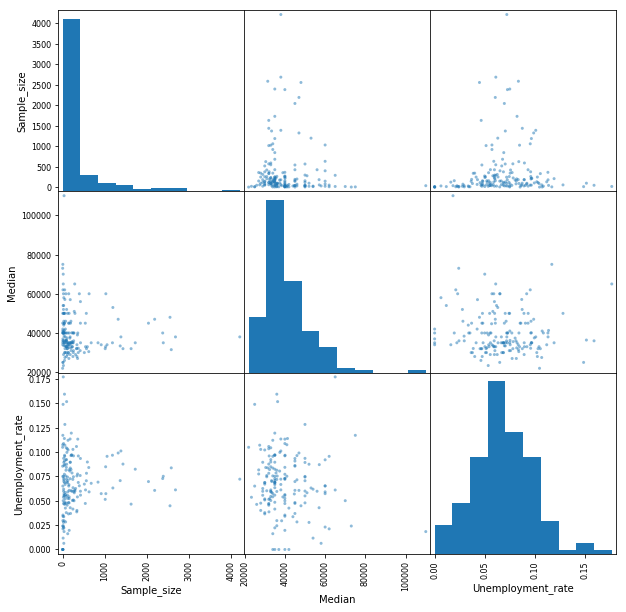

In [14]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']],
               figsize=(10,10))

### Bar Plots

As the dataset is ordered by the rank column (ranked by median earnings), let's look at Share of women in the first 15 and last 15 majors:

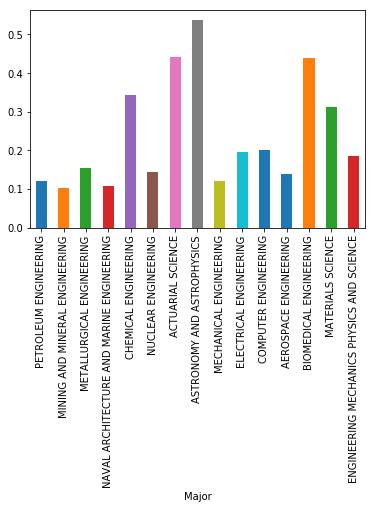

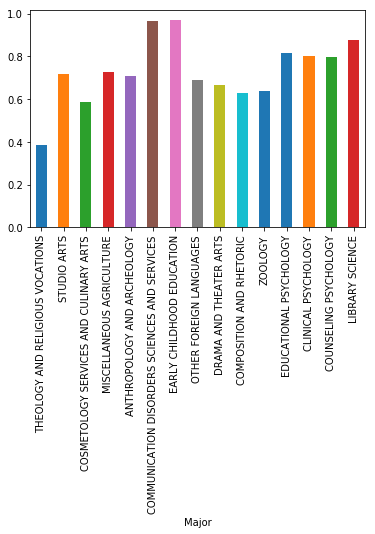

In [15]:
#first ten
recent_grads[:15].plot.bar(x='Major', y='ShareWomen', legend=False)
#last ten
recent_grads[-15:].plot.bar(x='Major', y='ShareWomen', legend=False)

Astronomy and Astrophysics, Actuarial Science, and Chemical Engineering have the highest female participation in the highest paid degrees, while many of the lower paying majors are dominated by female student population.  Again, this may show a disparity in male vs female income, but it could also illustrate a tendency for males to prefer Engineering degrees (or at least complete them).  Regardless, the lower paid majors are largely dominated by women graduates.

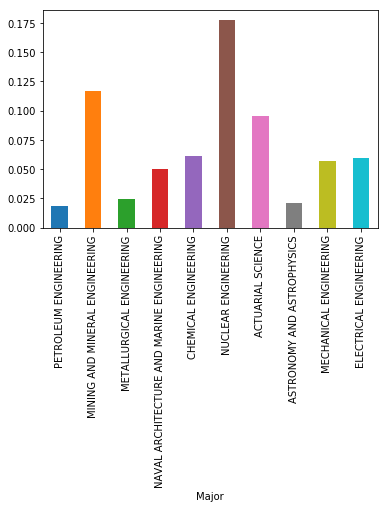

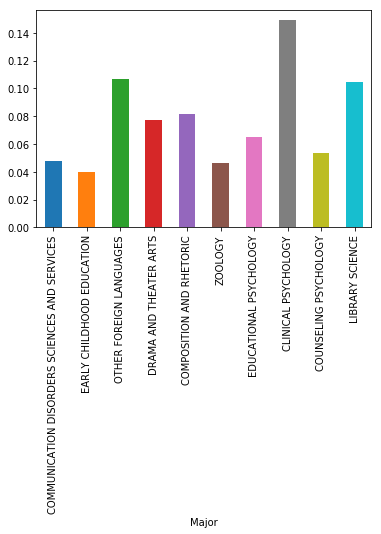

In [16]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=False)

The highest unemployment rates amongst the top 10 ranked majors are Nuclear Engineering, Mining and Mineral Engineering, and Actuarial Science.  Clinical Psychology, Library Science and Other Foreign Languages have the highest unemployment rates among the lowest ranked majors.